In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

load and preprocessing the data 

In [8]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()
x_train=x_train.astype('float32')/255.0
x_test=x_test.astype('float32')/255.0

y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)

In [9]:
model=Sequential()

model.add(Conv2D(96,kernel_size=(3,3),strides=(1,1),input_shape=(32,32,3),padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(BatchNormalization())

#layer 2 
model.add(Conv2D(256,kernel_size=(3,3),strides=(1,1),padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(BatchNormalization())

#layer 3 
model.add(Conv2D(384,kernel_size=(3,3),strides=(1,1),padding='same'))
model.add(Activation('relu'))

#layer 4 
model.add(Conv2D(384,kernel_size=(3,3),strides=(1,1),padding='same'))
model.add(Activation('relu'))

#layer 5 
model.add(Conv2D(384,kernel_size=(3,3),strides=(1,1),padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))


model.add(Flatten())


#Fully connected layer 
model.add(Dense(1024))
model.add(Activation('relu'))
model.add(Dropout(0.5))

#Fully connected layer 
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))

#output layer 
model.add(Dense(10))
model.add(Activation('softmax'))

compile >>> adam 
categorical crossentropy >> 

In [10]:
model.compile(loss='categorical_crossentropy',optimizer = 'adam',metrics=['accuracy'])

train the model 

In [11]:
history=model.fit(x_train,y_train,batch_size=128,epochs=15,validation_split=0.2,verbose=1)

Epoch 1/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 448s 1s/step - accuracy: 0.4128 - loss: 1.6092 - val_accuracy: 0.0981 - val_loss: 6.7612
Epoch 2/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 377s 1s/step - accuracy: 0.5877 - loss: 1.1699 - val_accuracy: 0.4090 - val_loss: 1.7789
Epoch 3/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 366s 1s/step - accuracy: 0.6663 - loss: 0.9603 - val_accuracy: 0.6467 - val_loss: 0.9994
Epoch 4/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 352s 1s/step - accuracy: 0.7187 - loss: 0.8188 - val_accuracy: 0.5961 - val_loss: 1.1800
Epoch 5/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 387s 1s/step - accuracy: 0.7581 - loss: 0.7082 - val_accuracy: 0.7102 - val_loss: 0.8400
Epoch 6/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 345s 1s/step - accuracy: 0.7903 - loss: 0.6164 - val_accuracy: 0.7164 - val_loss: 0.8740
Epoch 7/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 353s 1s/step - accuracy: 0.8163 - loss: 0.5354 - val_accuracy: 0.6933 - val_loss: 0.9238
Epoch 8/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 378s 1s/step - accuracy: 0.8447 - loss: 0.4586 - val_accu

Evaluate the model 

In [12]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f'Test Accuracy: {test_acc:.4f}')

Test Accuracy: 0.7480


plotting the model 

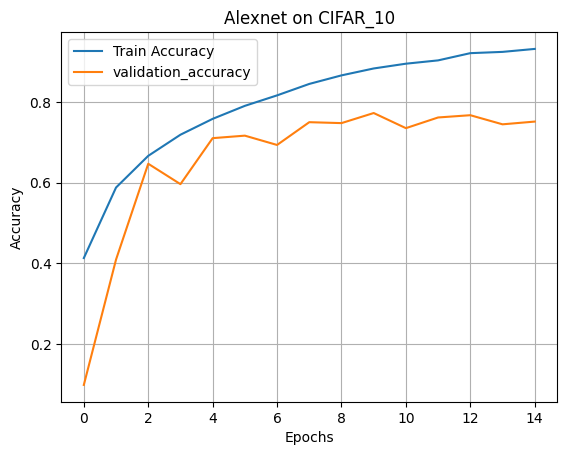

In [13]:
plt.plot(history.history['accuracy'],label='Train Accuracy')
plt.plot(history.history['val_accuracy'],label='validation_accuracy')
plt.title('Alexnet on CIFAR_10')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()